In [1]:

from utils import label_dirichlet_partition, parition_non_iid
import matplotlib.pyplot as plt
import torch

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'stix'

In [3]:
labels = []
number_of_nodes = 10000
class_num = 5
for i in range(class_num):
    labels += [i] * (number_of_nodes // class_num )

labels = torch.tensor(labels)
n_trainer = 20




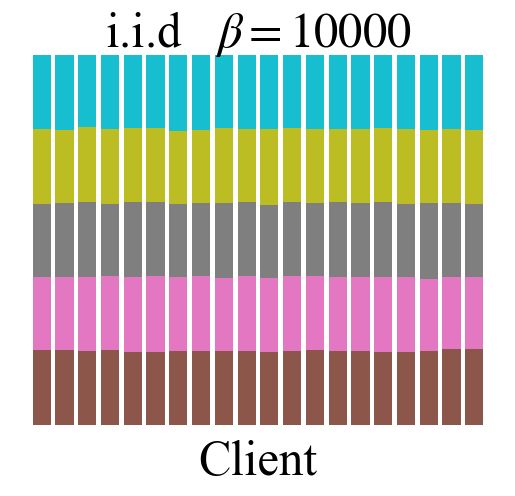

In [4]:


for iid_beta in [1, 10, 100, 10000]:
    node_partitions = label_dirichlet_partition(labels, len(labels), class_num, n_trainer, beta = iid_beta)

    distributions = []
    for i in range(n_trainer):
        distribution = []
        for j in range(class_num):
            distribution.append(torch.sum(labels[node_partitions[i]] == j) / len(node_partitions[i]))
        distributions.append(distribution)
    distributions = torch.tensor(distributions)

    ind = list(range(1, n_trainer + 1))

    plt.bar(ind, distributions[:, 0])

    bottom_acc = distributions[:, 0].clone()
    for i in range(1, class_num):
        plt.bar(ind, distributions[:, i],
                     bottom = bottom_acc)
        bottom_acc += distributions[:, i]
    #plt.axis('off')
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #plt.gca().yaxis.set_visible(False)

    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])

    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    # Remove tick marks on x-axis
    plt.tick_params(axis='x', which='both', bottom=False, top=False)
    plt.tick_params(axis='y', which='both', left=False, right=False)

    plt.xlabel("Client", fontsize=35)
    #plt.ylabel("Label Distribution", fontsize=20)
    if iid_beta == 10000:
        plt.title(f"i.i.d   $\\beta={iid_beta}$", fontsize=35)
    else:
        plt.title(f"Non-i.i.d   $\\beta={iid_beta}$", fontsize=35)
    plt.savefig(f"label_distribution_beta_{iid_beta}.pdf")
    #plt.show()

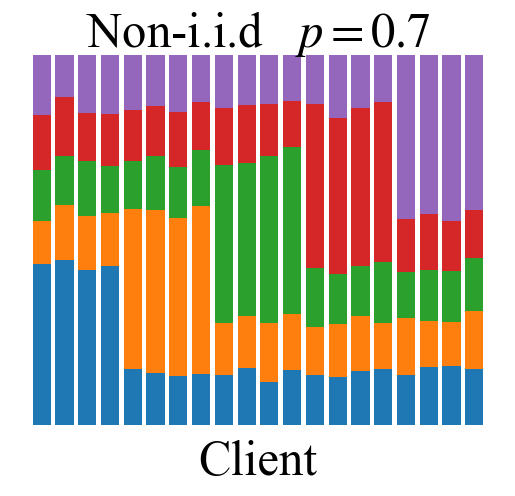

In [5]:


for non_iid in [1, 0.6, 0.3]:
    
    node_partitions = parition_non_iid(non_iid, labels, n_trainer, class_num, args_cuda = False)

    distributions = []
    for i in range(n_trainer):
        distribution = []
        for j in range(class_num):
            distribution.append(torch.sum(labels[node_partitions[i]] == j) / len(node_partitions[i]))
        distributions.append(distribution)
    distributions = torch.tensor(distributions)

    ind = list(range(1, n_trainer + 1))

    plt.bar(ind, distributions[:, 0])

    bottom_acc = distributions[:, 0].clone()
    for i in range(1, class_num):
        plt.bar(ind, distributions[:, i],
                     bottom = bottom_acc)
        bottom_acc += distributions[:, i]
    #plt.axis('off')
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #plt.gca().yaxis.set_visible(False)

    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])

    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    # Remove tick marks on x-axis
    plt.tick_params(axis='x', which='both', bottom=False, top=False)
    plt.tick_params(axis='y', which='both', left=False, right=False)

    plt.xlabel("Client", fontsize=35)
    if non_iid == 0:
        plt.ylabel("Label Distribution", fontsize=35)
    if non_iid == 0:
        plt.title(f"i.i.d   $p={1- non_iid}$", fontsize=35)
    else:
        plt.title(f"Non-i.i.d   $p={1 - non_iid}$", fontsize=35)
    plt.savefig(f"label_distribution_p_{1 - non_iid}.pdf")
    #plt.show()

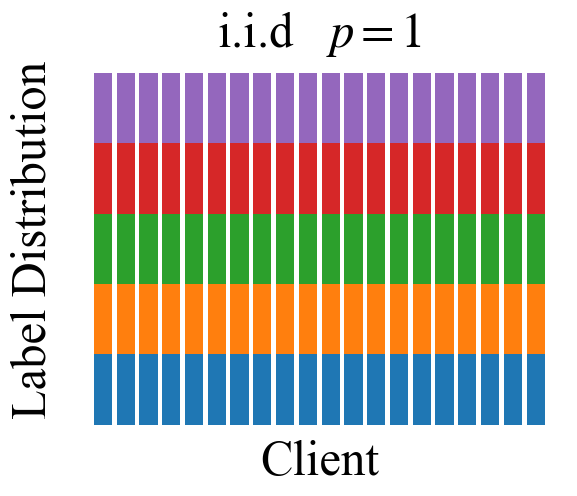

In [6]:
for non_iid in [0]:
    
    distributions = []
    for i in range(n_trainer):
        distributions.append([1/class_num] * class_num)
    distributions = torch.tensor(distributions)

    ind = list(range(1, n_trainer + 1))

    plt.bar(ind, distributions[:, 0])

    bottom_acc = distributions[:, 0].clone()
    for i in range(1, class_num):
        plt.bar(ind, distributions[:, i],
                     bottom = bottom_acc)
        bottom_acc += distributions[:, i]
    #plt.axis('off')
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #plt.gca().yaxis.set_visible(False)

    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])

    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    # Remove tick marks on x-axis
    plt.tick_params(axis='x', which='both', bottom=False, top=False)
    plt.tick_params(axis='y', which='both', left=False, right=False)

    plt.xlabel("Client", fontsize=35)
    plt.ylabel("Label Distribution", fontsize=35)
    if non_iid == 0:
        plt.title(f"i.i.d   $p={1- non_iid}$", fontsize=35)
    else:
        plt.title(f"Non-i.i.d   $p={1 - non_iid}$", fontsize=35)
    plt.savefig(f"label_distribution_p_{1 - non_iid}.pdf")
    #plt.show()